In [1]:
import pandas as pd

In [2]:
mushrooms = pd.read_csv('/content/agaricus-lepiota.data', header=None)

In [3]:
y_raw = mushrooms.iloc[:,0]
X_raw = mushrooms.iloc[:,1:]
y = (y_raw == 'p') * 1

In [4]:
from sklearn import preprocessing
encoder = preprocessing.OneHotEncoder()

encoder.fit(X_raw)

X = encoder.transform(X_raw).toarray()

In [11]:
#Initialize the classifier.
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=100)

#Conduct a grid search.
from sklearn import model_selection
grid = {
    'criterion': ['gini', 'entropy'],
    'max_features': [2, 4, 6, 8, 10, 12, 14]
}
gscv = model_selection.GridSearchCV(estimator=rfc, param_grid=grid, cv=5, scoring='accuracy')
gscv.fit(X,y)
results = pd.DataFrame(gscv.cv_results_)
results.sort_values('rank_test_score', ascending=True).head(10)



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.269853,0.010221,0.019403,0.000694,entropy,6,"{'criterion': 'entropy', 'max_features': 6}",0.842462,1.0,0.999385,1.0,0.838670,0.936103,0.078016,1
13,0.346484,0.010234,0.018184,0.000648,entropy,14,"{'criterion': 'entropy', 'max_features': 14}",0.842462,1.0,1.000000,1.0,0.821429,0.932778,0.082598,2
6,0.337975,0.014951,0.017965,0.000894,gini,14,"{'criterion': 'gini', 'max_features': 14}",0.842462,1.0,1.000000,1.0,0.819581,0.932409,0.083098,3
10,0.288314,0.009642,0.018829,0.000991,entropy,8,"{'criterion': 'entropy', 'max_features': 8}",0.842462,1.0,1.000000,1.0,0.806034,0.929699,0.086868,4
4,0.300035,0.007204,0.018703,0.002192,gini,10,"{'criterion': 'gini', 'max_features': 10}",0.842462,1.0,1.000000,1.0,0.798030,0.928098,0.089175,5
12,0.320359,0.004429,0.018885,0.001082,entropy,12,"{'criterion': 'entropy', 'max_features': 12}",0.842462,1.0,0.999385,1.0,0.796182,0.927606,0.089617,6
11,0.298215,0.013553,0.018413,0.000659,entropy,10,"{'criterion': 'entropy', 'max_features': 10}",0.842462,1.0,1.000000,1.0,0.792488,0.926990,0.090805,7
1,0.253074,0.007968,0.020930,0.001477,gini,4,"{'criterion': 'gini', 'max_features': 4}",0.842462,1.0,1.000000,1.0,0.781404,0.924773,0.094135,8
3,0.298062,0.017942,0.019701,0.001174,gini,8,"{'criterion': 'gini', 'max_features': 8}",0.842462,1.0,1.000000,1.0,0.760468,0.920586,0.100659,9
2,0.271572,0.011012,0.019550,0.000755,gini,6,"{'criterion': 'gini', 'max_features': 6}",0.842462,1.0,1.000000,1.0,0.759852,0.920463,0.100855,10


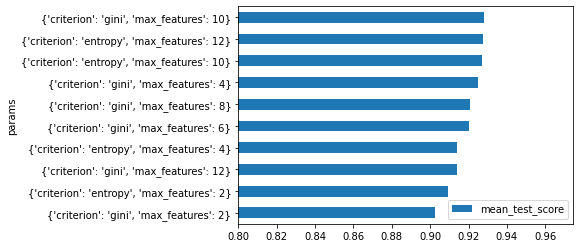

In [12]:
results.loc[:,'params'] = results.loc[:,'params'].astype(str)

(
    results.sort_values('rank_test_score', ascending=False)
    .loc[:,['params','mean_test_score']]
    .drop_duplicates()
    .head(10)
    .plot.barh(x='params', xlim=(0.8))
)